In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.feature_selection import f_regression

# Load y from Cui et al.'s formation data

In [2]:
filepath = f"""one_time_features_110323.csv"""
csvFile = pd.read_csv(filepath)
filepath = f"""protocol_params.xlsx"""
df_protocol_params = pd.read_excel(filepath)

In [3]:
y = csvFile.regu_life

In [4]:
ind_y = np.array([x for x in range(np.size(csvFile,0))])
ind_y = ind_y[~np.isnan(y)]
seq_num = csvFile.seq_num[ind_y]
y = y[ind_y]

ind_y = ind_y[seq_num != 206] # error loading Nova_Formation-206.csv
seq_num = np.array(seq_num[ind_y]) # error loading Nova_Formation-206.csv
y = np.array(y[ind_y])

In [5]:
len(ind_y)

178

In [6]:
import pandas as pd

df_A_Q_V_all = pd.read_excel("data_formation/A_Q_V_all.xlsx")
df_A_t_V_all = pd.read_excel("data_formation/A_t_V_all.xlsx")
df_B_Q_V_all = pd.read_excel("data_formation/B_Q_V_all.xlsx")
df_B_V_t_all = pd.read_excel("data_formation/B_V_t_all.xlsx")
df_C_Q_V_all = pd.read_excel("data_formation/C_Q_V_all.xlsx")
df_C_V_t_all = pd.read_excel("data_formation/C_V_t_all.xlsx")


In [7]:
A_Q_V_all = df_A_Q_V_all.iloc[:, 1:-3].to_numpy()
A_t_V_all = df_A_t_V_all.iloc[:, 1:-3].to_numpy()
B_Q_V_all = df_B_Q_V_all.iloc[:, 1:-3].to_numpy()
B_V_t_all = df_B_V_t_all.iloc[:, 1:-3].to_numpy()
C_Q_V_all = df_C_Q_V_all.iloc[:, 1:-3].to_numpy()
C_V_t_all = df_C_V_t_all.iloc[:, 1:-3].to_numpy()

# Should group formation protocols by protocol parameters

In [8]:
# CC1, CC2, CV, n are enough for group_labels.
group_label = np.array(list(df_protocol_params.groupby(by = ["CC1", "CC2", "CV", "n", "T", "t_OCV"]).ngroup()))
max(group_label)
pd.Series(data=df_protocol_params.groupby(by = ["CC1", "CC2", "CV", "n", "T", "t_OCV"]).ngroup()).to_excel("group_label.xlsx")

In [9]:
id = np.repeat([x+1 for x in range(len(ind_y))], 1000)#.astype(int)
V_ind = np.tile(1.5 + (4.4-1.5)/999 * np.array([x for x in range(1000)]).astype(int), len(ind_y))

A_Q_V_tsfresh = np.c_[id, V_ind, np.reshape(A_Q_V_all, (-1, 1))]
A_t_V_tsfresh = np.c_[id, V_ind, np.reshape(A_t_V_all, (-1, 1))]

A_Q_V_tsfresh_df = pd.DataFrame(A_Q_V_tsfresh, columns=['id', 'V', 'Q_V'])
A_t_V_tsfresh_df = pd.DataFrame(A_t_V_tsfresh, columns=['id', 'V', 't_V'])

id = np.repeat([x+1 for x in range(len(ind_y))], 1000)#.astype(int)
V_ind = np.tile(4.4 - (4.4-3.0)/999 * np.array([x for x in range(1000)]).astype(int), len(ind_y))
t_ind = np.tile(np.array([x for x in range(1000)]).astype(int), len(ind_y))
B_Q_V_tsfresh = np.c_[id, V_ind, np.reshape(B_Q_V_all, (-1, 1))]
B_V_t_tsfresh = np.c_[id, t_ind, np.reshape(B_V_t_all, (-1, 1))]

B_Q_V_tsfresh_df = pd.DataFrame(B_Q_V_tsfresh, columns=['id', 'V', 'Q_V'])
B_V_t_tsfresh_df = pd.DataFrame(B_V_t_tsfresh, columns=['id', 't', 'V_t'])

id = np.repeat([x+1 for x in range(len(ind_y))], 1000)#.astype(int)
V_ind = np.tile(4.4 - (4.4-3.0)/999 * np.array([x for x in range(1000)]).astype(int), len(ind_y))
t_ind = np.tile(np.array([x for x in range(1000)]).astype(int), len(ind_y))
C_Q_V_tsfresh = np.c_[id, V_ind, np.reshape(C_Q_V_all, (-1, 1))]
C_V_t_tsfresh = np.c_[id, t_ind, np.reshape(C_V_t_all, (-1, 1))]

C_Q_V_tsfresh_df = pd.DataFrame(C_Q_V_tsfresh, columns=['id', 'V', 'Q_V'])
C_V_t_tsfresh_df = pd.DataFrame(C_V_t_tsfresh, columns=['id', 't', 'V_t'])


# Generate folders if not exist

In [14]:
import os
if not os.path.exists(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML"):
    os.mkdir(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML")
if not os.path.exists(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML_labeled"):
    os.mkdir(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML_labeled")
if not os.path.exists(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML_fulllist"):
    os.mkdir(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML_fulllist")

# Extract features from each f(V) and f(t) in region A (first charge: CC1-CC2) using tsfresh

In [12]:
from tsfresh import extract_features
A_Q_V_extracted_features = extract_features(A_Q_V_tsfresh_df, column_id="id", column_sort="V")
A_t_V_extracted_features = extract_features(A_t_V_tsfresh_df, column_id="id", column_sort="V")
B_Q_V_extracted_features = extract_features(B_Q_V_tsfresh_df, column_id="id", column_sort="V")
B_V_t_extracted_features = extract_features(B_V_t_tsfresh_df, column_id="id", column_sort="t")
C_Q_V_extracted_features = extract_features(C_Q_V_tsfresh_df, column_id="id", column_sort="V")
C_V_t_extracted_features = extract_features(C_V_t_tsfresh_df, column_id="id", column_sort="t")

Feature Extraction: 100%|██████████| 20/20 [01:57<00:00,  5.90s/it]


In [16]:
A_Q_V_extracted_features.to_excel(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML_fulllist/A_Q_V_extracted_features.xlsx")
A_t_V_extracted_features.to_excel(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML_fulllist/A_t_V_extracted_features.xlsx")
B_Q_V_extracted_features.to_excel(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML_fulllist/B_Q_V_extracted_features.xlsx")
B_V_t_extracted_features.to_excel(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML_fulllist/B_V_t_extracted_features.xlsx")
C_Q_V_extracted_features.to_excel(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML_fulllist/C_Q_V_extracted_features.xlsx")
C_V_t_extracted_features.to_excel(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML_fulllist/C_V_t_extracted_features.xlsx")

# Pre-screen features that are constant

In [12]:
from tsfresh.utilities.dataframe_functions import impute
impute(A_Q_V_extracted_features)
impute(A_t_V_extracted_features)
impute(B_Q_V_extracted_features)
impute(B_V_t_extracted_features)
impute(C_Q_V_extracted_features)
impute(C_V_t_extracted_features)

A_Q_V_index_notconstant = np.where(A_Q_V_extracted_features.max(axis=0) != A_Q_V_extracted_features.min(axis=0))[0]
_, A_Q_V_p_values = f_regression(A_Q_V_extracted_features[A_Q_V_extracted_features.columns[A_Q_V_index_notconstant]], y.reshape(-1, 1))
A_t_V_index_notconstant = np.where(A_t_V_extracted_features.max(axis=0) != A_t_V_extracted_features.min(axis=0))[0]
_, A_t_V_p_values = f_regression(A_t_V_extracted_features[A_t_V_extracted_features.columns[A_t_V_index_notconstant]], y.reshape(-1, 1))
B_Q_V_index_notconstant = np.where(B_Q_V_extracted_features.max(axis=0) != B_Q_V_extracted_features.min(axis=0))[0]
_, B_Q_V_p_values = f_regression(B_Q_V_extracted_features[B_Q_V_extracted_features.columns[B_Q_V_index_notconstant]], y.reshape(-1, 1))
B_V_t_index_notconstant = np.where(B_V_t_extracted_features.max(axis=0) != B_V_t_extracted_features.min(axis=0))[0]
_, B_V_t_p_values = f_regression(B_V_t_extracted_features[B_V_t_extracted_features.columns[B_V_t_index_notconstant]], y.reshape(-1, 1))
C_Q_V_index_notconstant = np.where(C_Q_V_extracted_features.max(axis=0) != C_Q_V_extracted_features.min(axis=0))[0]
_, C_Q_V_p_values = f_regression(C_Q_V_extracted_features[C_Q_V_extracted_features.columns[C_Q_V_index_notconstant]], y.reshape(-1, 1))
C_V_t_index_notconstant = np.where(C_V_t_extracted_features.max(axis=0) != C_V_t_extracted_features.min(axis=0))[0]
_, C_V_t_p_values = f_regression(C_V_t_extracted_features[C_V_t_extracted_features.columns[C_V_t_index_notconstant]], y.reshape(-1, 1))


c:\Users\ChemeGrad2021\anaconda3\envs\HDRegAnalytics\lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['Q_V__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(
c:\Users\ChemeGrad2021\anaconda3\envs\HDRegAnalytics\lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['t_V__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(
c:\Users\ChemeGrad2021\anaconda3\envs\HDRegAnalytics\lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['Q_V__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(
c:\Users\ChemeGrad2021\anaconda3\envs\HDRegAnalytics\lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['V_t__query_similarity_count__query

Text(0.5, 1.0, 'p values in V^{C}(t)')

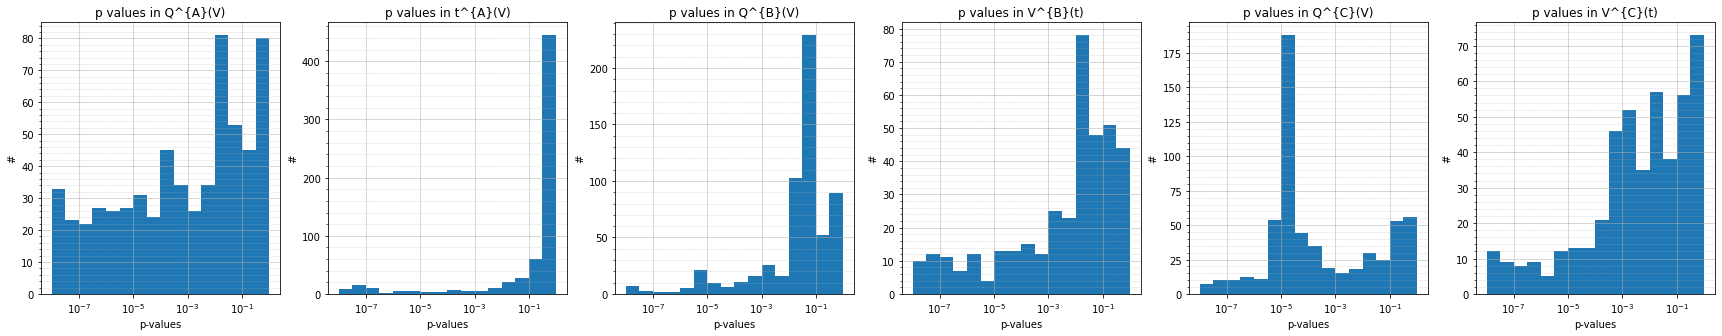

In [13]:
fig, axs = plt.subplots(figsize=(30,5), nrows=1, ncols=6)

logbins = np.logspace(-8,0,17)

axs[0].hist(A_Q_V_p_values, bins=logbins)
axs[0].set_xscale('log')
axs[0].minorticks_on()
axs[0].grid(which='major', linestyle='-', linewidth='0.5')
axs[0].grid(which='minor', linestyle=':', linewidth='0.5')
axs[0].set_xlabel('p-values')
axs[0].set_ylabel('#')
axs[0].set_title('p values in Q^{A}(V)')

axs[1].hist(A_t_V_p_values, bins=logbins)
axs[1].set_xscale('log')
axs[1].minorticks_on()
axs[1].grid(which='major', linestyle='-', linewidth='0.5')
axs[1].grid(which='minor', linestyle=':', linewidth='0.5')
axs[1].set_xlabel('p-values')
axs[1].set_ylabel('#')
axs[1].set_title('p values in t^{A}(V)')

axs[2].hist(B_Q_V_p_values, bins=logbins)
axs[2].set_xscale('log')
axs[2].minorticks_on()
axs[2].grid(which='major', linestyle='-', linewidth='0.5')
axs[2].grid(which='minor', linestyle=':', linewidth='0.5')
axs[2].set_xlabel('p-values')
axs[2].set_ylabel('#')
axs[2].set_title('p values in Q^{B}(V)')

axs[3].hist(B_V_t_p_values, bins=logbins)
axs[3].set_xscale('log')
axs[3].minorticks_on()
axs[3].grid(which='major', linestyle='-', linewidth='0.5')
axs[3].grid(which='minor', linestyle=':', linewidth='0.5')
axs[3].set_xlabel('p-values')
axs[3].set_ylabel('#')
axs[3].set_title('p values in V^{B}(t)')

axs[4].hist(C_Q_V_p_values, bins=logbins)
axs[4].set_xscale('log')
axs[4].minorticks_on()
axs[4].grid(which='major', linestyle='-', linewidth='0.5')
axs[4].grid(which='minor', linestyle=':', linewidth='0.5')
axs[4].set_xlabel('p-values')
axs[4].set_ylabel('#')
axs[4].set_title('p values in Q^{C}(V)')

axs[5].hist(C_V_t_p_values, bins=logbins)
axs[5].set_xscale('log')
axs[5].minorticks_on()
axs[5].grid(which='major', linestyle='-', linewidth='0.5')
axs[5].grid(which='minor', linestyle=':', linewidth='0.5')
axs[5].set_xlabel('p-values')
axs[5].set_ylabel('#')
axs[5].set_title('p values in V^{C}(t)')

# Filter features by using univariate test followed by tsfresh.select_features

In [ ]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

alpha_list_log = np.linspace(-8,0,17)

for alpha in alpha_list_log:
    
    A_Q_V_features_univariate = A_Q_V_extracted_features[A_Q_V_extracted_features.columns[A_Q_V_index_notconstant[A_Q_V_p_values < 10 ** alpha]]]
    A_Q_V_features_univariate.to_excel(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML_labeled/A_Q_V_features_univariate_" + str(abs(alpha)) + ".xlsx")
    A_Q_V_features_univariate_SPA = A_Q_V_features_univariate
    A_Q_V_features_univariate_SPA['y'] = y
    A_Q_V_features_univariate_SPA.to_excel(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML/A_Q_V_features_univariate_" + str(abs(alpha)) + ".xlsx", header=False, index=False)
    A_Q_V_features_univariate_tsfresh = select_features(A_Q_V_features_univariate, y)
    A_Q_V_features_univariate_tsfresh.to_excel(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML_labeled/A_Q_V_features_univariate_tsfresh_" + str(abs(alpha)) + ".xlsx")
    A_Q_V_features_univariate_tsfresh_SPA = A_Q_V_features_univariate_tsfresh
    A_Q_V_features_univariate_tsfresh_SPA['y'] = y
    A_Q_V_features_univariate_tsfresh_SPA.to_excel(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML/A_Q_V_features_univariate_tsfresh_" + str(abs(alpha)) + ".xlsx", header=False, index=False)
    
    A_t_V_features_univariate = A_t_V_extracted_features[A_t_V_extracted_features.columns[A_t_V_index_notconstant[A_t_V_p_values < 10 ** alpha]]]
    A_t_V_features_univariate.to_excel(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML_labeled/A_t_V_features_univariate_" + str(abs(alpha)) + ".xlsx")
    A_t_V_features_univariate_SPA = A_t_V_features_univariate
    A_t_V_features_univariate_SPA['y'] = y
    A_t_V_features_univariate_SPA.to_excel(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML/A_t_V_features_univariate_" + str(abs(alpha)) + ".xlsx", header=False, index=False)
    A_t_V_features_univariate_tsfresh = select_features(A_t_V_features_univariate, y)
    A_t_V_features_univariate_tsfresh.to_excel(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML_labeled/A_t_V_features_univariate_tsfresh_" + str(abs(alpha)) + ".xlsx")
    A_t_V_features_univariate_tsfresh_SPA = A_t_V_features_univariate_tsfresh
    A_t_V_features_univariate_tsfresh_SPA['y'] = y
    A_t_V_features_univariate_tsfresh_SPA.to_excel(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML/A_t_V_features_univariate_tsfresh_" + str(abs(alpha)) + ".xlsx", header=False, index=False)

    B_Q_V_features_univariate = B_Q_V_extracted_features[B_Q_V_extracted_features.columns[B_Q_V_index_notconstant[B_Q_V_p_values < 10 ** alpha]]]
    B_Q_V_features_univariate.to_excel(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML_labeled/B_Q_V_features_univariate_" + str(abs(alpha)) + ".xlsx")
    B_Q_V_features_univariate_SPA = B_Q_V_features_univariate
    B_Q_V_features_univariate_SPA['y'] = y
    B_Q_V_features_univariate_SPA.to_excel(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML/B_Q_V_features_univariate_" + str(abs(alpha)) + ".xlsx", header=False, index=False)
    B_Q_V_features_univariate_tsfresh = select_features(B_Q_V_features_univariate, y)
    B_Q_V_features_univariate_tsfresh.to_excel(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML_labeled/B_Q_V_features_univariate_tsfresh_" + str(abs(alpha)) + ".xlsx")
    B_Q_V_features_univariate_tsfresh_SPA = B_Q_V_features_univariate_tsfresh
    B_Q_V_features_univariate_tsfresh_SPA['y'] = y
    B_Q_V_features_univariate_tsfresh_SPA.to_excel(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML/B_Q_V_features_univariate_tsfresh_" + str(abs(alpha)) + ".xlsx", header=False, index=False)
    
    B_V_t_features_univariate = B_V_t_extracted_features[B_V_t_extracted_features.columns[B_V_t_index_notconstant[B_V_t_p_values < 10 ** alpha]]]
    B_V_t_features_univariate.to_excel(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML_labeled/B_V_t_features_univariate_" + str(abs(alpha)) + ".xlsx")
    B_V_t_features_univariate_SPA = B_V_t_features_univariate
    B_V_t_features_univariate_SPA['y'] = y
    B_V_t_features_univariate_SPA.to_excel(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML/B_V_t_features_univariate_" + str(abs(alpha)) + ".xlsx", header=False, index=False)
    B_V_t_features_univariate_tsfresh = select_features(B_V_t_features_univariate, y)
    B_V_t_features_univariate_tsfresh.to_excel(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML_labeled/B_V_t_features_univariate_tsfresh_" + str(abs(alpha)) + ".xlsx")
    B_V_t_features_univariate_tsfresh_SPA = B_V_t_features_univariate_tsfresh
    B_V_t_features_univariate_tsfresh_SPA['y'] = y
    B_V_t_features_univariate_tsfresh_SPA.to_excel(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML/B_V_t_features_univariate_tsfresh_" + str(abs(alpha)) + ".xlsx", header=False, index=False)

    C_Q_V_features_univariate = C_Q_V_extracted_features[C_Q_V_extracted_features.columns[C_Q_V_index_notconstant[C_Q_V_p_values < 10 ** alpha]]]
    C_Q_V_features_univariate.to_excel(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML_labeled/C_Q_V_features_univariate_" + str(abs(alpha)) + ".xlsx")
    C_Q_V_features_univariate_SPA = C_Q_V_features_univariate
    C_Q_V_features_univariate_SPA['y'] = y
    C_Q_V_features_univariate_SPA.to_excel(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML/C_Q_V_features_univariate_" + str(abs(alpha)) + ".xlsx", header=False, index=False)
    C_Q_V_features_univariate_tsfresh = select_features(C_Q_V_features_univariate, y)
    C_Q_V_features_univariate_tsfresh.to_excel(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML_labeled/C_Q_V_features_univariate_tsfresh_" + str(abs(alpha)) + ".xlsx")
    C_Q_V_features_univariate_tsfresh_SPA = C_Q_V_features_univariate_tsfresh
    C_Q_V_features_univariate_tsfresh_SPA['y'] = y
    C_Q_V_features_univariate_tsfresh_SPA.to_excel(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML/C_Q_V_features_univariate_tsfresh_" + str(abs(alpha)) + ".xlsx", header=False, index=False)
    
    C_V_t_features_univariate = C_V_t_extracted_features[C_V_t_extracted_features.columns[C_V_t_index_notconstant[C_V_t_p_values < 10 ** alpha]]]
    C_V_t_features_univariate.to_excel(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML_labeled/C_V_t_features_univariate_" + str(abs(alpha)) + ".xlsx")
    C_V_t_features_univariate_SPA = C_V_t_features_univariate
    C_V_t_features_univariate_SPA['y'] = y
    C_V_t_features_univariate_SPA.to_excel(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML/C_V_t_features_univariate_" + str(abs(alpha)) + ".xlsx", header=False, index=False)
    C_V_t_features_univariate_tsfresh = select_features(C_V_t_features_univariate, y)
    C_V_t_features_univariate_tsfresh.to_excel(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML_labeled/C_V_t_features_univariate_tsfresh_" + str(abs(alpha)) + ".xlsx")
    C_V_t_features_univariate_tsfresh_SPA = C_V_t_features_univariate_tsfresh
    C_V_t_features_univariate_tsfresh_SPA['y'] = y
    C_V_t_features_univariate_tsfresh_SPA.to_excel(os.path.dirname(os.getcwd()) + "/Features_tsfresh_autoML/C_V_t_features_univariate_tsfresh_" + str(abs(alpha)) + ".xlsx", header=False, index=False)
    

C:\Users\ChemeGrad2021\AppData\Local\Temp\ipykernel_105768\2516334402.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A_Q_V_features_univariate_SPA['y'] = y
C:\Users\ChemeGrad2021\AppData\Local\Temp\ipykernel_105768\2516334402.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A_t_V_features_univariate_SPA['y'] = y
C:\Users\ChemeGrad2021\AppData\Local\Temp\ipykernel_105768\2516334402.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_